In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('careermitra_dataset.csv')

In [3]:
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [4]:
X = df.loc[:, ['Acedamic percentage in Operating Systems', 'percentage in Algorithms','Percentage in Programming Concepts','Percentage in Software Engineering','Percentage in Computer Networks','Percentage in Communication skills','Percentage in Mathematics','Percentage in Computer Architecture','Percentage in Electronics Subjects']]

In [5]:
X

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Communication skills,Percentage in Mathematics,Percentage in Computer Architecture,Percentage in Electronics Subjects
0,69,63,78,87,94,61,84,87,94
1,78,62,73,60,71,91,84,73,70
2,71,86,91,87,61,94,72,72,81
3,76,87,60,84,89,69,88,62,73
4,92,62,90,67,71,73,71,73,89
...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,69,84,90,74
19996,80,69,83,87,82,67,92,66,66
19997,83,70,80,87,64,88,94,69,85
19998,68,87,91,88,66,61,87,61,74


In [6]:
y = df[['Suggested Job Role']]

In [9]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # This converts strings to 0, 1, 2, ...

# Now convert to float32 if needed (for TensorFlow)
y_encoded = np.array(y_encoded, dtype=np.float32)

# Now y_encoded can be used for training
print(y[:5])         # Original labels
print(y_encoded[:5]) # Encoded labels

               Suggested Job Role
0              Database Developer
1            Portal Administrator
2            Portal Administrator
3  Systems Security Administrator
4        Business Systems Analyst
[ 7. 18. 18. 28.  2.]


C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
y_encoded

array([ 7., 18., 18., ...,  1., 24.,  0.], dtype=float32)

In [11]:
num_classes = len(np.unique(y_encoded))

In [12]:
num_classes

34

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # 9 input features
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')         # Multi-class output
])

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(9,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 34)                  │           2,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,746 (45.88 KB)

 Trainable params: 11,746 (45.88 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_scaled, y_encoded, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1120 - loss: 3.2458 - val_accuracy: 0.0375 - val_loss: 3.7746
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1092 - loss: 3.2515 - val_accuracy: 0.0347 - val_loss: 3.7906
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1133 - loss: 3.2440 - val_accuracy: 0.0360 - val_loss: 3.7770
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1137 - loss: 3.2350 - val_accuracy: 0.0367 - val_loss: 3.7845
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1217 - loss: 3.2277 - val_accuracy: 0.0358 - val_loss: 3.7969
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1228 - loss: 3.2296 - val_accuracy: 0.0377 - val_loss: 3.7884
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1199 - loss: 3.2338 - val_accuracy: 0.0360 - val_loss: 3.8102
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1239 - loss: 3.2186 - val_accu

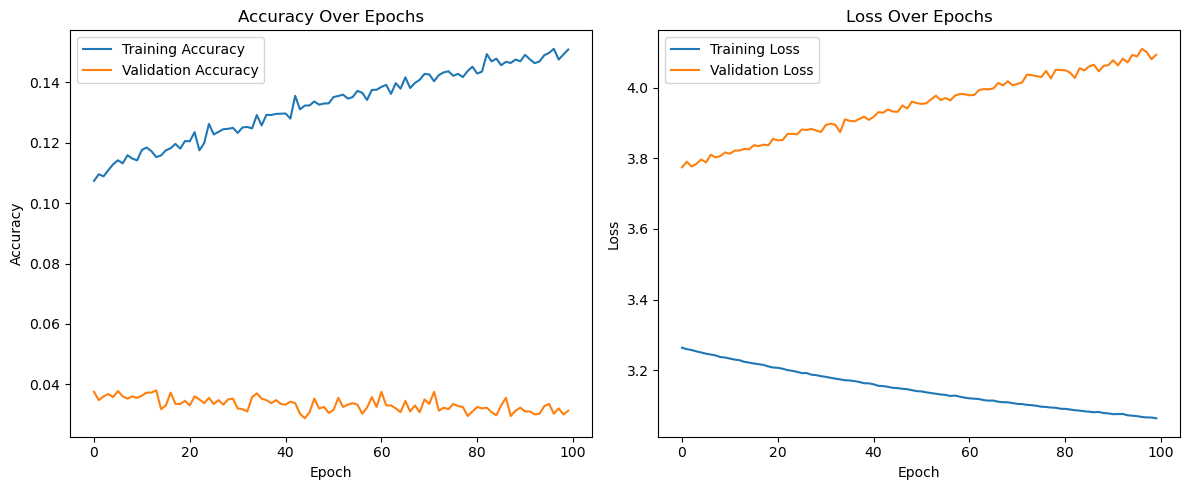

In [22]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()